In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)
#sns.set_context('poster')
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

import sklearn as sk
import sklearn.cluster as cluster
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import time

In [7]:
# load cleaned data
dtypespec = {"weeks": object, "peak": object, "var9": object, "var10": object, "var11": object, "var12": object, "var13": object}
billboardDF = pd.read_csv('billboardDF.csv',sep=",",header='infer', dtype=dtypespec)
evolutionDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
uniqueTracksDF = pd.read_csv('evolutionDF.csv',sep=",",header='infer')
musicDF = pd.read_csv('musicDF.csv',sep=",",header='infer')
musicSubset = pd.read_csv('musicSubset.csv',sep=",",header='infer')


In [8]:
#write cluster plot function to help us
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    silhouette_score = sk.metrics.silhouette_score(data, labels, metric='euclidean')
    print(silhouette_score)
    # palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    # colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    # plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    # frame = plt.gca()
    # frame.axes.get_xaxis().set_visible(True)
    # frame.axes.get_yaxis().set_visible(True)
    # plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    # plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

In [9]:
decade = musicSubset.ix[:, 9].copy()
clusterDF = musicSubset.ix[:, 12:28].copy()
#clusterDF = decade + handt
clusterMat = clusterDF.as_matrix()

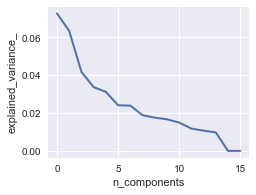

In [12]:
## PCA decomosition
pca = sk.decomposition.PCA()
# pipe = sk.pipeline.Pipeline(steps=[('pca', pca), ('logistic', clusterDF)])
pca.fit(clusterDF)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

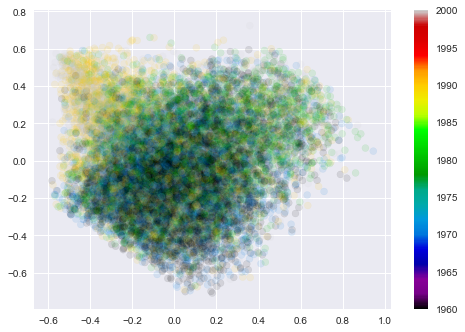

In [37]:
pca = sk.decomposition.PCA(n_components = 2)
pca.fit(clusterDF)
clusterPCA = pca.transform(clusterDF)
#y = np.choose(y, [0, 1]).astype(np.float)
plot = plt.scatter(clusterPCA[:, 0], clusterPCA[:, 1], c=decade, alpha=0.1, cmap=plt.cm.spectral)
bar = plt.colorbar(plot)
bar.set_alpha(1)
bar.draw_all()

In [26]:
pca.components_
# 12, 7 are the largest

array([[-0.02364468, -0.21896306, -0.22971669,  0.1502283 , -0.2416125 ,
         0.10330183,  0.00608788,  0.45431893, -0.06608848, -0.29539638,
        -0.27763344,  0.16788182,  0.61742269,  0.03959426, -0.13613467,
        -0.0496458 ],
       [ 0.02641621,  0.03769666,  0.07250841, -0.09651523,  0.31096796,
        -0.00726164,  0.12793621, -0.47174858,  0.19922537, -0.35213074,
         0.26383001, -0.198171  ,  0.48643066, -0.07214358, -0.36324287,
         0.03620216]])

In [41]:
print('silhouette score - all features:')
plot_clusters(clusterDF,cluster.KMeans,(),{'n_clusters':5})
print('silhouette score - PCA 2 Components:')
plot_clusters(clusterPCA,cluster.KMeans,(),{'n_clusters':5})

silhouette score - all features:
0.147168897069
silhouette score - PCA 2 Components:
0.355598251604


In [ ]:
af = cluster.AffinityPropagation(preference=-50).fit(clusterPCA)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(clusterPCA, labels, metric='sqeuclidean'))